Case - ε = 0, init = 0: processed in 14.96 seconds.
Case - ε = 0.5, init = 0: processed in 17.29 seconds.
Case - ε = 0.05, init = 0: processed in 15.23 seconds.
Case - ε = 0, init = 10: processed in 14.82 seconds.
Case - ε = 0.5, init = 10: processed in 17.62 seconds.
Case - ε = 0.05, init = 10: processed in 15.77 seconds.


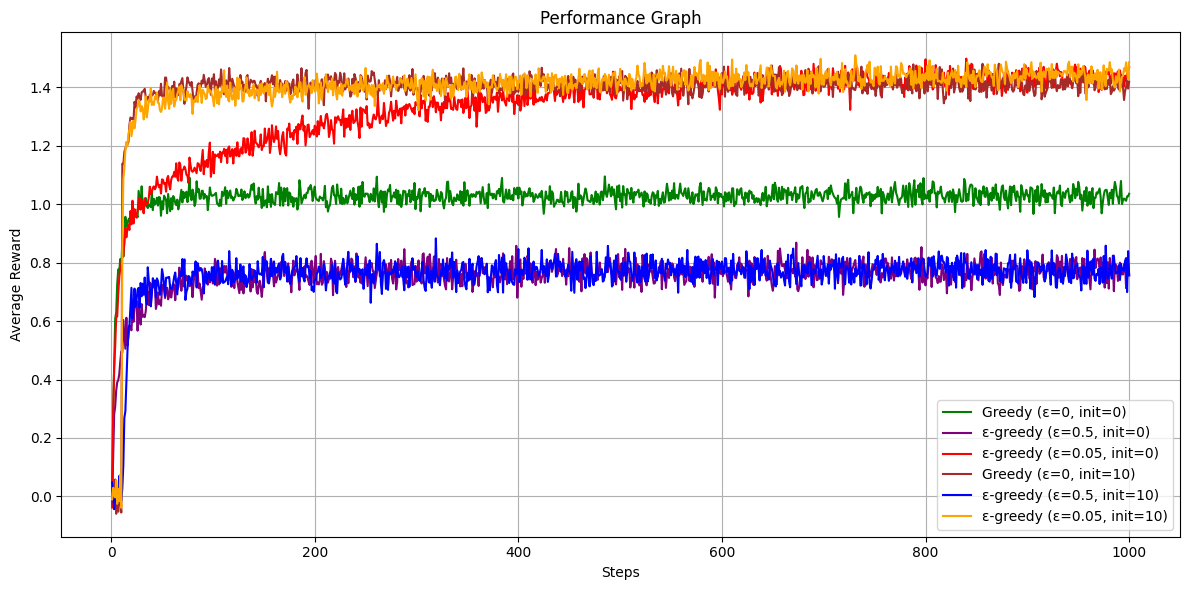

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
class narmedbandit:
    def __init__(self, n_arms=10, init_value=0):
        self.n_arms = n_arms
        self.truevalues = np.random.normal(0, 1, n_arms)
        self.estimates = np.ones(n_arms) * init_value
        self.actioncounts = np.zeros(n_arms)
    def pullarm(self, arm):
        return np.random.normal(self.truevalues[arm], 1)
    def updtestimates(self, arm, reward):
        self.actioncounts[arm] += 1
        self.estimates[arm] += (reward - self.estimates[arm])/self.actioncounts[arm]
def selectaction(estimates, epsilon):
    return np.random.randint(len(estimates)) if np.random.random() < epsilon else np.argmax(estimates)
def runningexperiment(n_bandits=2000, n_steps=1000, n_arms=10, epsilon=0, init_value=0):
    rewards = np.zeros((n_bandits, n_steps))
    starttime = time.time()
    for bandit_idx in range(n_bandits):
        bandit = narmedbandit(n_arms, init_value)
        for step in range(n_steps):
            arm = selectaction(bandit.estimates, epsilon)
            reward = bandit.pullarm(arm)
            bandit.updtestimates(arm, reward)
            rewards[bandit_idx, step] = reward
    elapsedtime = time.time() - starttime
    print(f"Case - ε = {epsilon}, init = {init_value}: processed in {elapsedtime:.2f} seconds.")
    return rewards.mean(axis=0)
def plottingresults():
    n_steps = 1000
    steps = np.arange(1, n_steps + 1)
    configs = [
        {"epsilon": 0, "init": 0, "label": "Greedy (ε=0, init=0)", "color": "green"},
        {"epsilon": 0.5, "init": 0, "label": "ε-greedy (ε=0.5, init=0)", "color": "purple"},
        {"epsilon": 0.05, "init": 0, "label": "ε-greedy (ε=0.05, init=0)", "color": "red"},
        {"epsilon": 0, "init": 10, "label": "Greedy (ε=0, init=10)", "color": "brown"},
        {"epsilon": 0.5, "init": 10, "label": "ε-greedy (ε=0.5, init=10)", "color": "blue"},
        {"epsilon": 0.05, "init": 10, "label": "ε-greedy (ε=0.05, init=10)", "color": "orange"}]
    plt.figure(figsize=(12, 6))
    for config in configs:
        rewards = runningexperiment(epsilon=config["epsilon"], init_value=config["init"])
        plt.plot(steps, rewards, label=config["label"], color=config["color"])
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title("Performance Graph")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    plottingresults()